In [1]:
pip install pandas matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b1/79/0d1c165eac44405a86478082e225fce87874f7198300bbebc55faaf6d28d/matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/66/48/29752962a74b7ed95da976b5a968bba1fe611a4a7e50b9fefa345e6e7025/fonttools-4.58.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ----------- --------------------------- 30.7/106.6 kB 1.4 MB/s 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los CSV
gdp_df = pd.read_csv("gdp_cleaned.csv")
meat_df = pd.read_csv("meat_consumption_cleaned.csv")
countries_df = pd.read_csv("countries.csv")

# Unir los datos
merged_df = pd.merge(gdp_df, meat_df, on=["country_id", "Year"])
merged_df = pd.merge(merged_df, countries_df, on="country_id")

# Renombrar columna continente si está mal
merged_df.rename(columns={"Ð¡ontinent": "Continent", "Сontinent": "Continent"}, inplace=True)

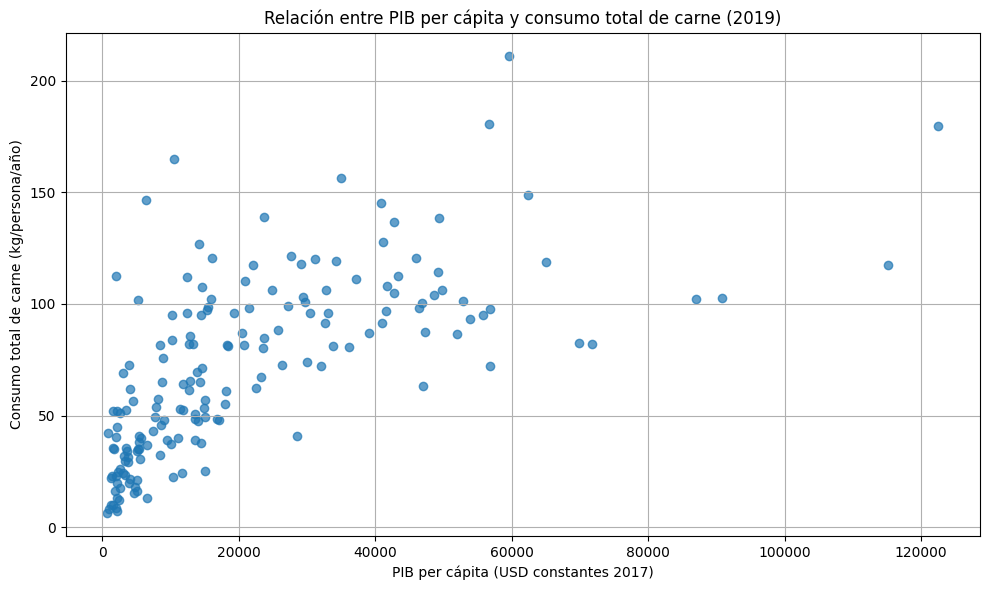

In [3]:
df_2019 = merged_df[merged_df["Year"] == 2019].copy()
df_2019["gdp_per_capita"] = pd.to_numeric(df_2019["GDP per capita, PPP (constant 2017 international $)"], errors="coerce")
df_2019["total_meat_consumption"] = (
    df_2019["Poultry"] + df_2019["Beef"] + df_2019["Sheep and goat"] +
    df_2019["Pork"] + df_2019["Other meats"] + df_2019["Fish and seafood"]
)
df_2019.dropna(subset=["gdp_per_capita", "total_meat_consumption"], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df_2019["gdp_per_capita"], df_2019["total_meat_consumption"], alpha=0.7)
plt.title("Relación entre PIB per cápita y consumo total de carne (2019)")
plt.xlabel("PIB per cápita (USD constantes 2017)")
plt.ylabel("Consumo total de carne (kg/persona/año)")
plt.grid(True)
plt.tight_layout()
plt.show()

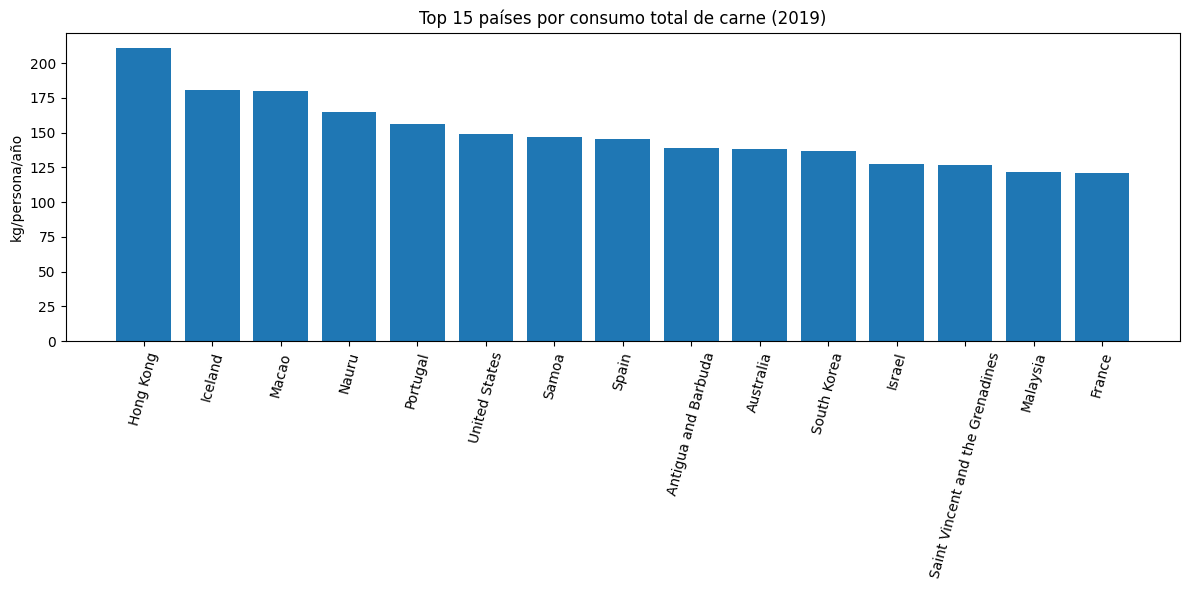

In [4]:
top15 = df_2019.sort_values(by="total_meat_consumption", ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.bar(top15["Entity"], top15["total_meat_consumption"])
plt.xticks(rotation=75)
plt.title("Top 15 países por consumo total de carne (2019)")
plt.ylabel("kg/persona/año")
plt.tight_layout()
plt.show()

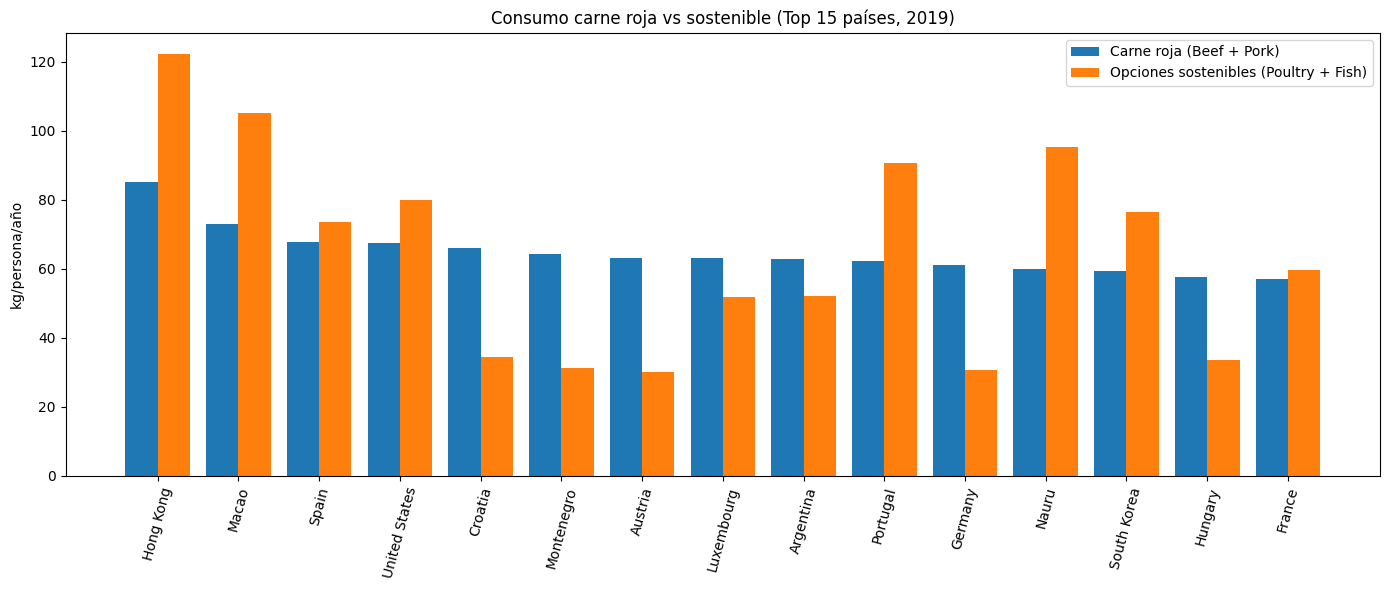

In [5]:
df_2019["red_meat"] = df_2019["Beef"] + df_2019["Pork"]
df_2019["sustainable_meat"] = df_2019["Poultry"] + df_2019["Fish and seafood"]

top_red = df_2019.sort_values(by="red_meat", ascending=False).head(15)

plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(top_red))

plt.bar(x, top_red["red_meat"], width=bar_width, label="Carne roja (Beef + Pork)")
plt.bar([i + bar_width for i in x], top_red["sustainable_meat"], width=bar_width, label="Opciones sostenibles (Poultry + Fish)")

plt.xticks([i + bar_width / 2 for i in x], top_red["Entity"], rotation=75)
plt.title("Consumo carne roja vs sostenible (Top 15 países, 2019)")
plt.ylabel("kg/persona/año")
plt.legend()
plt.tight_layout()
plt.show()

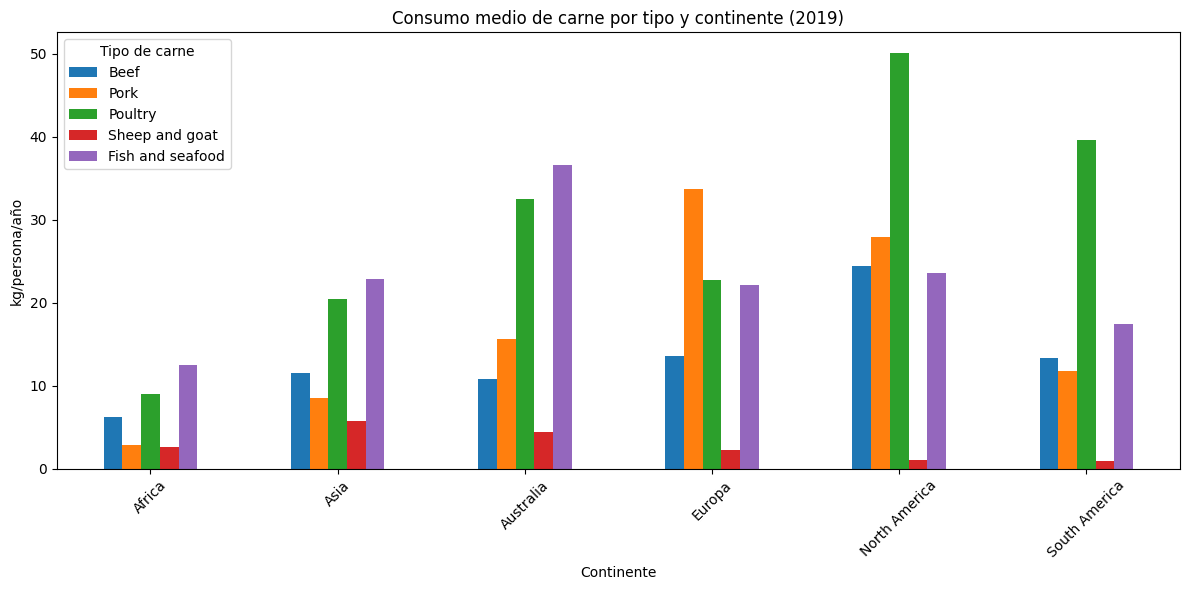

In [6]:
continent_means = df_2019.groupby("Continent")[["Beef", "Pork", "Poultry", "Sheep and goat", "Fish and seafood"]].mean().round(2)

continent_means.plot(kind='bar', figsize=(12, 6))
plt.title("Consumo medio de carne por tipo y continente (2019)")
plt.ylabel("kg/persona/año")
plt.xlabel("Continente")
plt.xticks(rotation=45)
plt.legend(title="Tipo de carne")
plt.tight_layout()
plt.show()

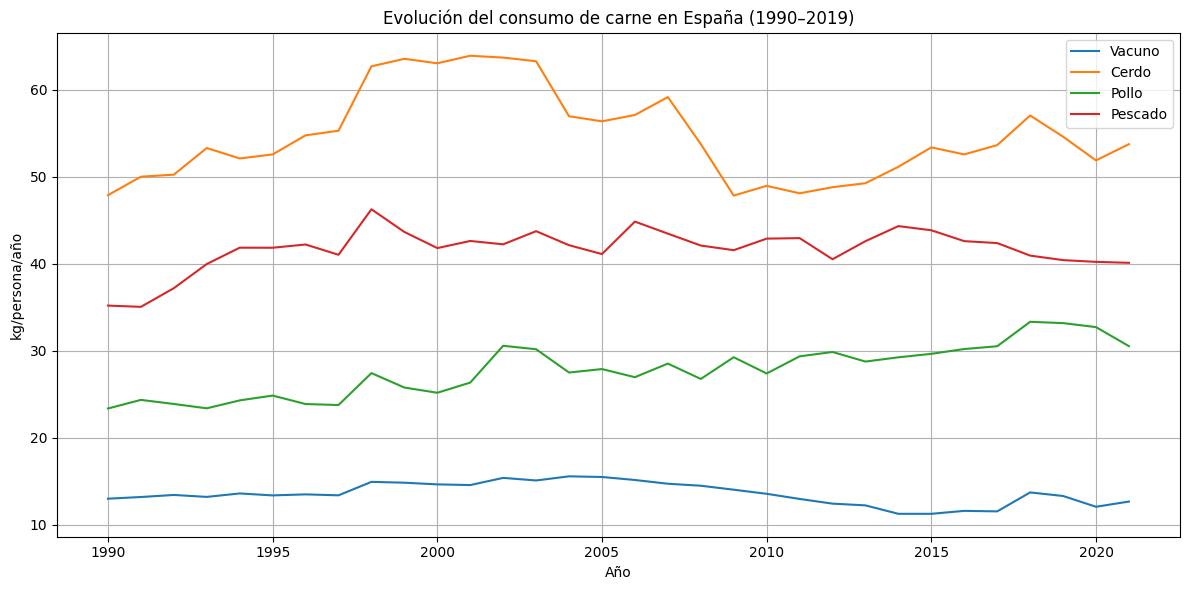

In [7]:
spain_df = merged_df[merged_df["Entity_y"] == "Spain"].copy()
spain_df.sort_values(by="Year", inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(spain_df["Year"], spain_df["Beef"], label="Vacuno")
plt.plot(spain_df["Year"], spain_df["Pork"], label="Cerdo")
plt.plot(spain_df["Year"], spain_df["Poultry"], label="Pollo")
plt.plot(spain_df["Year"], spain_df["Fish and seafood"], label="Pescado")

plt.title("Evolución del consumo de carne en España (1990–2019)")
plt.xlabel("Año")
plt.ylabel("kg/persona/año")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()